# Exercises - GEO4902-02 - Data Assimilation

Kjerssti Stangeland, Fall 2024

# Exercise 02-03 -  Single observation data assimilation experiment

For (a) testing new observations, (b) analyzing their impact, and (c) understanding the impact of the data assimilation system we often perform so-called “single-observation experiments”. Only one single observation is included in the data assimilation system and we can compare the background and the analysis. In the following example, a radiosonde temperature observation at 500 hPa height has been assimilated.  

The background xB and analysis xA include the prognostic variables of temperature, wind, and specific humidity. The data files are for the Norwegian area and distributed in 60 vertical levels. The python script for this exercise gives you the access points to this data and two plotting routines, in order to plot vertical sections and horizontal layers of the model data.

- Find out where the radiosonde was assimilated. (level and geographical location)
- Estimate the spatial impact this one observation has.   
- What is the impact on wind and humidity, and why&how could that be realized in the data assimilation system?

In [1]:
# import python packages
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import cartopy as cy
import cmocean.cm as cmo

#### Load BACKGROUND fields of temperature,wind, and specific humidity

In [2]:
url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/remap.varn.BG.nc'
model_background = xr.open_dataset(url)

#### Load ANALYSIS fields of temperature,wind, and specific humidity
#### This analysis has been produced by assimilating a radiosonde information at 500hPa

In [3]:
url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/remap.varn.LPB_POS2_TEMP500.nc'
model_analysis = xr.open_dataset(url)

The data is stored in the original coordinates of the model, but do not worry about that. Just assume it is some kind of vertical discretization. Remember that you can look in the metadata to find the variable names and coordinate information! 

### Below are two plotting routines which yo can use to plot horizontal and vertical sections of the model. 

In [4]:
timestep=0; modellevel=59
temp_background = model_background['air_temperature'].isel(time=timestep).sel(lev_2=modellevel)
temp_analysis   = model_analysis['air_temperature'].isel(time=timestep).sel(lev=modellevel)

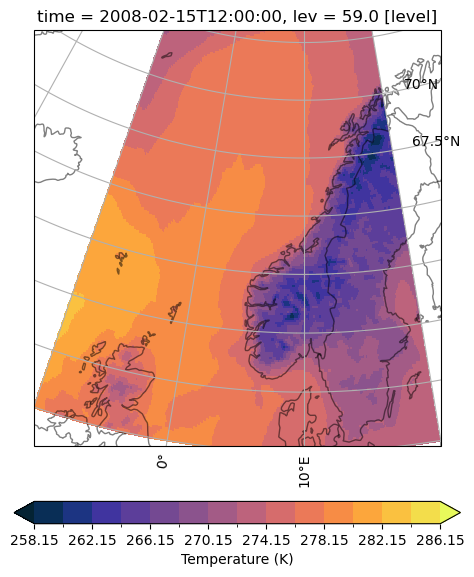

In [6]:
projection = cy.crs.Stereographic(central_latitude=78.4, central_longitude=10.0, )
# projection = cy.crs.PlateCarree()
f, ax = plt.subplots(1,1, subplot_kw={'projection':projection}, figsize=[7.2, 7.2])
# plot cosmetics
ax.set_extent([-10, 20, 55, 72], cy.crs.PlateCarree())
ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
ax.add_feature(cy.feature.BORDERS, alpha=0.5)
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False

temp_analysis.plot.pcolormesh(ax=ax, 
                              x='lon',
                              y='lat',
                              cmap=cmo.thermal,
                              extend='both',
                              levels=np.arange(258.15, 288.15,2),
                              transform=cy.crs.PlateCarree(), 
                              cbar_kwargs={'orientation':'horizontal','label':'Temperature (K)', 'shrink':0.8, 'pad':0.1})

In [7]:
timestep=0; seclat=20; # Intersection at latitude model_analysis.lat[seclat]

tempvert_background = model_background['air_temperature'].isel(time=timestep, lat=seclat)
tempvert_analysis   = model_analysis['air_temperature'].isel(time=timestep, lat=seclat)

windvert_background =(np.sqrt(model_background['x_wind']**2 + model_background['y_wind']**2)).isel(time=timestep, lat=seclat)
windvert_analysis   =(np.sqrt(model_analysis['x_wind']**2 + model_analysis['y_wind']**2)).isel(time=timestep, lat=seclat)

humidvert_background = model_background['specific_humidity'].isel(time=timestep, lat=seclat)
humidvert_analysis   = model_analysis['specific_humidity'].isel(time=timestep, lat=seclat)

(60.5, 0.5)

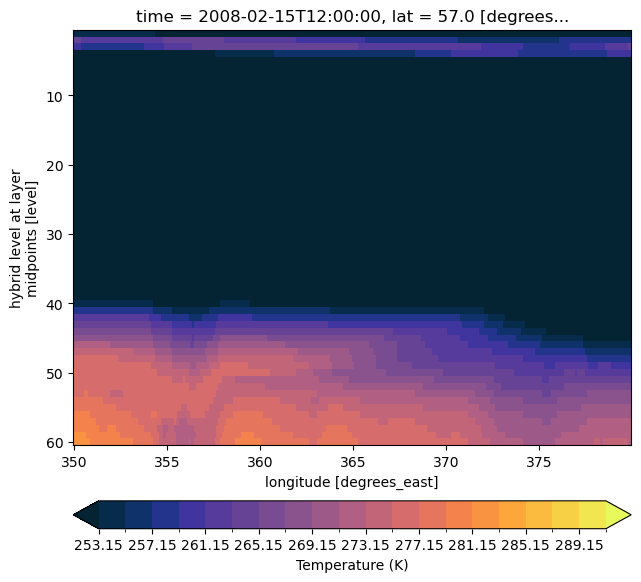

In [8]:
f, ax = plt.subplots(1,1,figsize=[7.2, 7.2])

tempvert_background.plot(ax=ax, 
                         x='lon', 
                         y='lev_2', 
                         cmap=cmo.thermal, 
                         extend='both', 
                         levels=np.arange(253.15, 293.15,2),
                         cbar_kwargs={'orientation':'horizontal','label':'Temperature (K)', 'shrink':1, 'pad':0.1})
ax.set_ylim(ax.get_ylim()[::-1])